In [13]:
import os
import cv2
from scipy.stats import skew, skewtest, itemfreq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
image_path = './PE_stage_eyegaze_benchmarking/image_enhancement/'
images = []
bw_imgs = []
for fname in os.listdir(image_path):
    img = cv2.imread(os.path.join(image_path, fname))
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(rgb)
    bw_imgs.append(gray)

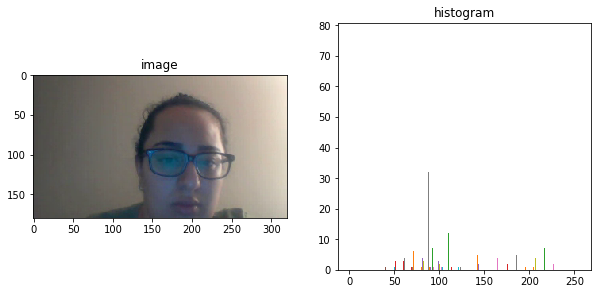

In [80]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
plt.title('image')
# plt.set_cmap('gray')
plt.imshow(images[5])

fig.add_subplot(222)
plt.title('histogram')
plt.hist(bw_imgs[5], 256, [0,256])

# plt.tight_layout()
plt.show()

#### Skew calculation in grayscale image histogram

In [48]:
vals = itemfreq(bw_imgs[2])[:,1]
vals=vals-np.mean(vals)
vals=vals/np.std(vals)
# print(vals)
skew(vals, bias=False)

/home/himanshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


1.663170043328711

In [45]:
# vals

#### Brightness improvement using linear pixel transformation

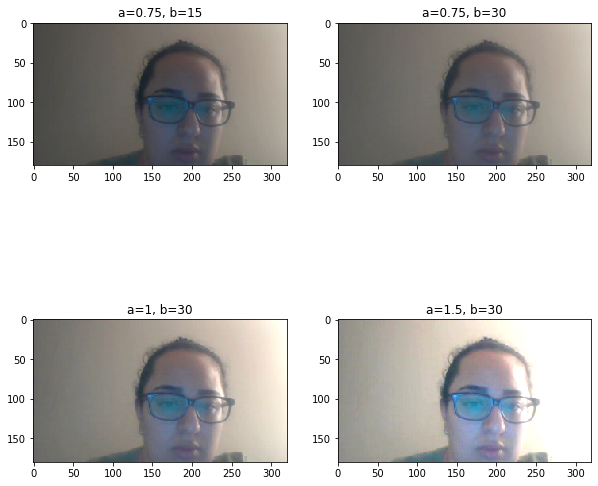

In [74]:

def change_brightness(image, alpha, beta):
    new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return new_image

new_image = change_brightness(images[5],0.75, 15)
new_image1 = change_brightness(images[5],0.75, 30)
new_image2 = change_brightness(images[5],1, 30)
new_image3 = change_brightness(images[5],1.5, 30)

fig = plt.figure(figsize=(10,10))

fig.add_subplot(221)
plt.title(f'a={0.75}, b={15}')
plt.imshow(new_image)

fig.add_subplot(222)
plt.title(f'a={0.75}, b={30}')
plt.imshow(new_image1)

fig.add_subplot(223)
plt.title(f'a={1}, b={30}')
plt.imshow(new_image2)

fig.add_subplot(224)
plt.title(f'a={1.5}, b={30}')
plt.imshow(new_image3)

plt.show()

#### Gamma correction

In [37]:
def gamma_correction(image,gamma):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    res = cv2.LUT(image, lookUpTable)
    return res

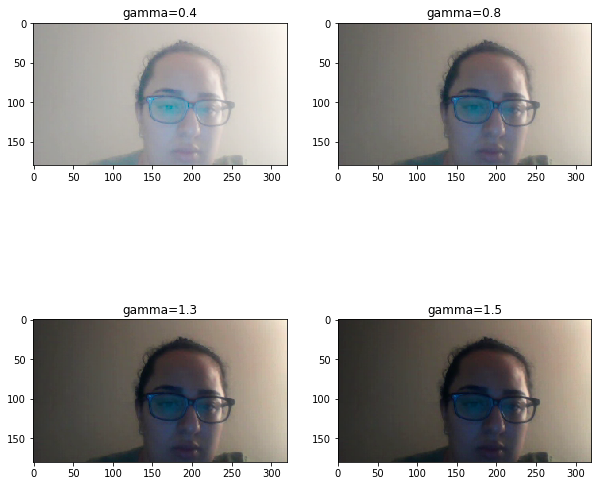

In [38]:
g_corr1 = gamma_correction(images[2], gamma=0.4)
g_corr2 = gamma_correction(images[2], gamma=0.8)
g_corr3 = gamma_correction(images[2], gamma=1.3)
g_corr4 = gamma_correction(images[2], gamma=1.5)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
plt.title(f'gamma={0.4}')
plt.imshow(g_corr1)

fig.add_subplot(222)
plt.title(f'gamma={0.8}')
plt.imshow(g_corr2)

fig.add_subplot(223)
plt.title(f'gamma={1.3}')
plt.imshow(g_corr3)

fig.add_subplot(224)
plt.title(f'gamma={1.5}')
plt.imshow(g_corr4)

plt.show()

#### Image histogram equalization

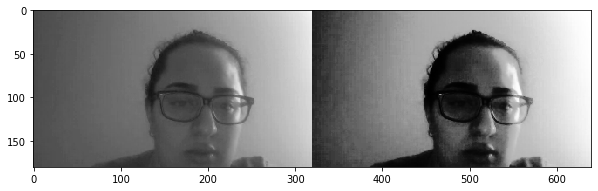

In [57]:
fig = plt.figure(figsize=(10,10))
equ = cv2.equalizeHist(bw_imgs[2])
res = np.hstack((bw_imgs[2],equ)) #stacking images side-by-side
plt.imshow(res, cmap = plt.cm.gray)

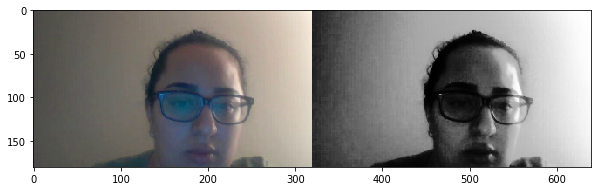

In [58]:
fig = plt.figure(figsize=(10,10))
equ_col = cv2.cvtColor(equ, cv2.COLOR_GRAY2BGR)
res_col = np.hstack((images[2], equ_col))
plt.imshow(res_col)

#### Contrast Limited Adaptive Histogram Equalization

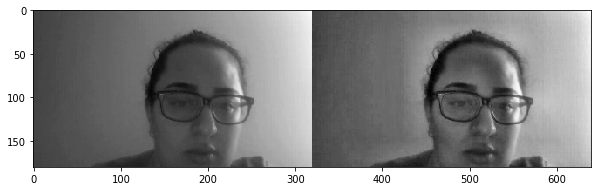

In [69]:
fig = plt.figure(figsize=(10,10))
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
cl1 = clahe.apply(bw_imgs[2])
cl_img = np.hstack((bw_imgs[2], cl1))
plt.imshow(cl_img, cmap=plt.cm.gray)

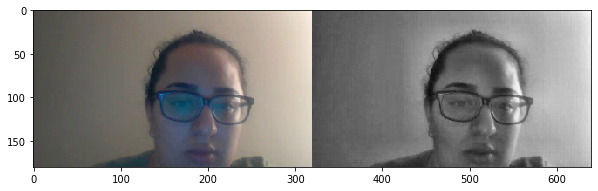

In [77]:
fig = plt.figure(figsize=(10,10))
cl1_col = cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)
cl_im_col = np.hstack((images[5], cl1_col))
plt.imshow(cl_im_col)

In [78]:
cv2.imwrite("./clahe_3_channel.png", cl1_col)

True